<a href="https://colab.research.google.com/github/AbdullahEmadeldeen/Machine-Learning/blob/main/ibm_unsupervised_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt , seaborn as sns


The dataset used for this project is the Spambase dataset from the UCI Machine Learning Repository. It contains 4,601 email records with 57 continuous features that represent:

Word frequencies (e.g., how often words like "money", "free", or "hp" appear)

Character frequencies (e.g., frequencies of ;, (, [, !, $, #)

Capital letter statistics:

capital_run_length_average

capital_run_length_longest

capital_run_length_total

The final column class is a binary indicator showing whether the email was spam (1) or not (0), though this was not used during model training as unsupervised methods do not rely on labels.

Preprocessing included:

Removal of highly correlated features

Log transformation for skewed features

Scaling using StandardScaler

Dimensionality reduction with PCA

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/spambase_output.csv')

DROP CLASS FOR CLUSTERING


In [ ]:
y = df["class"]
df.drop(columns=["class"],axis=1,inplace=True)

In [ ]:
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

AttributeError: 'NoneType' object has no attribute 'sum'

In [ ]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [ ]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [ ]:
df.shape

(4601, 57)

# **check skewness of data**

In [ ]:
skewness = df.skew().sort_values(ascending=False)

# Show top 10 most skewed features
print("Top Skewed Features:")
print(skewness[abs(skewness) > 2].index.to_list())

Top Skewed Features:
['char_freq_hash', 'capital_run_length_longest', 'word_freq_parts', 'word_freq_3d', 'capital_run_length_average', 'char_freq_bracket', 'word_freq_table', 'word_freq_conference', 'word_freq_project', 'char_freq_exclamation', 'word_freq_85', 'word_freq_money', 'word_freq_credit', 'char_freq_semicolon', 'char_freq_paren', 'word_freq_data', 'word_freq_telnet', 'word_freq_cs', 'word_freq_pm', 'word_freq_report', 'word_freq_lab', 'char_freq_dollar', 'word_freq_free', 'word_freq_857', 'word_freq_415', 'word_freq_edu', 'word_freq_address', 'word_freq_font', 'word_freq_internet', 'word_freq_meeting', 'word_freq_direct', 'word_freq_re', 'capital_run_length_total', 'word_freq_mail', 'word_freq_technology', 'word_freq_original', 'word_freq_addresses', 'word_freq_people', 'word_freq_remove', 'word_freq_labs', 'word_freq_650', 'word_freq_hpl', 'word_freq_over', 'word_freq_george', 'word_freq_hp', 'word_freq_000', 'word_freq_business', 'word_freq_make', 'word_freq_receive', 'word

# remove **skewness**

In [ ]:

skewed_cols = skewness[skewness > 2].index.tolist()
print(f"Applying log1p to {len(skewed_cols)} features: {skewed_cols}")

# Apply log1p transform
df[skewed_cols] = df[skewed_cols].apply(lambda col: np.log1p(col))

Applying log1p to 56 features: ['char_freq_hash', 'capital_run_length_longest', 'word_freq_parts', 'word_freq_3d', 'capital_run_length_average', 'char_freq_bracket', 'word_freq_table', 'word_freq_conference', 'word_freq_project', 'char_freq_exclamation', 'word_freq_85', 'word_freq_money', 'word_freq_credit', 'char_freq_semicolon', 'char_freq_paren', 'word_freq_data', 'word_freq_telnet', 'word_freq_cs', 'word_freq_pm', 'word_freq_report', 'word_freq_lab', 'char_freq_dollar', 'word_freq_free', 'word_freq_857', 'word_freq_415', 'word_freq_edu', 'word_freq_address', 'word_freq_font', 'word_freq_internet', 'word_freq_meeting', 'word_freq_direct', 'word_freq_re', 'capital_run_length_total', 'word_freq_mail', 'word_freq_technology', 'word_freq_original', 'word_freq_addresses', 'word_freq_people', 'word_freq_remove', 'word_freq_labs', 'word_freq_650', 'word_freq_hpl', 'word_freq_over', 'word_freq_george', 'word_freq_hp', 'word_freq_000', 'word_freq_business', 'word_freq_make', 'word_freq_recei

In [ ]:
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.494696,0.494696,0.0,0.277632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.575489,0.000000,0.000000,1.559407,4.127134,5.631212
1,0.190620,0.246860,0.405465,0.0,0.131028,0.246860,0.190620,0.067659,0.000000,0.662688,...,0.0,0.000000,0.123986,0.0,0.316270,0.165514,0.046884,1.810581,4.624973,6.936343
2,0.058269,0.000000,0.536493,0.0,0.802002,0.173953,0.173953,0.113329,0.494696,0.223144,...,0.0,0.009950,0.133656,0.0,0.243730,0.168899,0.009950,2.381489,6.186209,7.723120
3,0.000000,0.000000,0.000000,0.0,0.488580,0.000000,0.270027,0.488580,0.270027,0.488580,...,0.0,0.000000,0.128393,0.0,0.128393,0.000000,0.000000,1.512266,3.713572,5.257495
4,0.000000,0.000000,0.000000,0.0,0.488580,0.000000,0.270027,0.488580,0.270027,0.488580,...,0.0,0.000000,0.126633,0.0,0.126633,0.000000,0.000000,1.512266,3.713572,5.257495
5,0.000000,0.000000,0.000000,0.0,1.047319,0.000000,0.000000,1.047319,0.000000,0.000000,...,0.0,0.000000,0.201307,0.0,0.000000,0.000000,0.000000,1.386294,2.772589,4.007333
6,0.000000,0.000000,0.000000,0.0,1.071584,0.000000,0.000000,0.000000,0.000000,0.494696,...,0.0,0.000000,0.052592,0.0,0.151862,0.052592,0.000000,0.982453,1.609438,4.727388
7,0.000000,0.000000,0.000000,0.0,1.057790,0.000000,0.000000,1.057790,0.000000,0.000000,...,0.0,0.000000,0.187309,0.0,0.000000,0.000000,0.000000,1.238374,2.484907,3.912023
8,0.139762,0.000000,0.378436,0.0,0.476234,0.000000,0.262364,0.000000,0.652325,0.565314,...,0.0,0.000000,0.239804,0.0,0.166362,0.184818,0.021761,2.374347,6.100319,7.137278
9,0.058269,0.113329,0.570980,0.0,0.173953,0.277632,0.322083,0.000000,0.058269,0.000000,...,0.0,0.039221,0.029559,0.0,0.218332,0.077887,0.000000,1.003935,3.784190,6.620073


scalling Data using **RobustScaler**

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)


In [ ]:
X_scaled.shape

(4601, 57)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = df.columns
X_scaled.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.494696,1.410770,0.0,0.861987,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.365556,0.0,2.101578,0.000000,0.000000,0.623433,0.736855,0.532439
1,0.190620,0.246860,1.156302,0.0,0.406815,0.246860,0.190620,0.067659,0.000000,4.464950,...,0.0,0.000000,0.354158,0.0,1.154957,3.265028,0.046884,1.043490,1.007673,1.183790
2,0.058269,0.000000,1.529967,0.0,2.490042,0.173953,0.173953,0.113329,0.494696,1.503460,...,0.0,0.009950,0.410292,0.0,0.890057,3.331785,0.009950,1.998260,1.856965,1.576446
3,0.000000,0.000000,0.000000,0.0,1.516936,0.000000,0.270027,0.488580,0.270027,3.291874,...,0.0,0.000000,0.379741,0.0,0.468868,0.000000,0.000000,0.544596,0.511883,0.345928
4,0.000000,0.000000,0.000000,0.0,1.516936,0.000000,0.270027,0.488580,0.270027,3.291874,...,0.0,0.000000,0.369521,0.0,0.462439,0.000000,0.000000,0.544596,0.511883,0.345928
5,0.000000,0.000000,0.000000,0.0,3.251700,0.000000,0.000000,1.047319,0.000000,0.000000,...,0.0,0.000000,0.802990,0.0,0.000000,0.000000,0.000000,0.333925,0.000000,-0.277989
6,0.000000,0.000000,0.000000,0.0,3.327037,0.000000,0.000000,0.000000,0.000000,3.333083,...,0.0,0.000000,-0.060267,0.0,0.554573,1.037467,0.000000,-0.341449,-0.632739,0.081368
7,0.000000,0.000000,0.000000,0.0,3.284211,0.000000,0.000000,1.057790,0.000000,0.000000,...,0.0,0.000000,0.721736,0.0,0.000000,0.000000,0.000000,0.086547,-0.156495,-0.325555
8,0.139762,0.000000,1.079222,0.0,1.478605,0.000000,0.262364,0.000000,0.652325,3.808879,...,0.0,0.000000,1.026458,0.0,0.607521,3.645829,0.021761,1.986317,1.810242,1.284071
9,0.058269,0.113329,1.628314,0.0,0.540088,0.277632,0.322083,0.000000,0.058269,0.000000,...,0.0,0.039221,-0.193973,0.0,0.797307,1.536432,0.000000,-0.305522,0.550298,1.025949


data before scalling


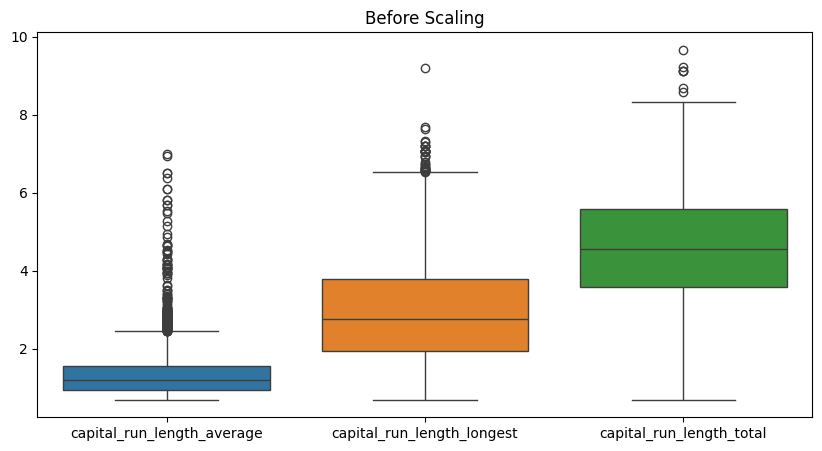

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']])
plt.title("Before Scaling")
plt.show()


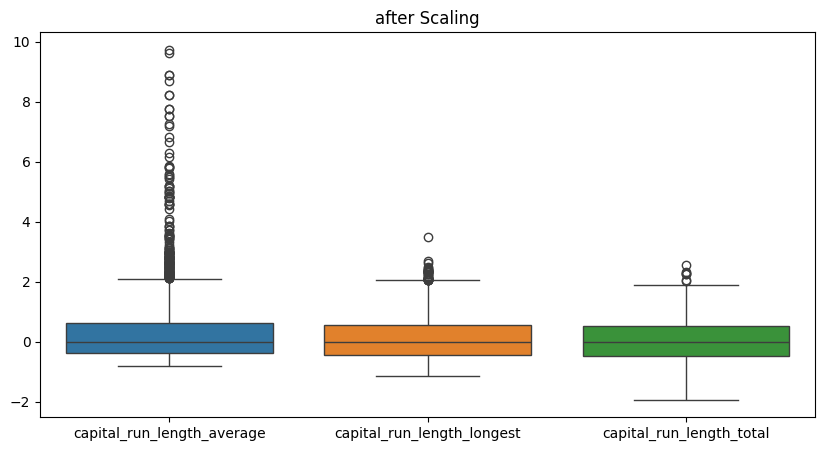

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_scaled[['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']])
plt.title("after Scaling")
plt.show()

# Corellation *heatmap*

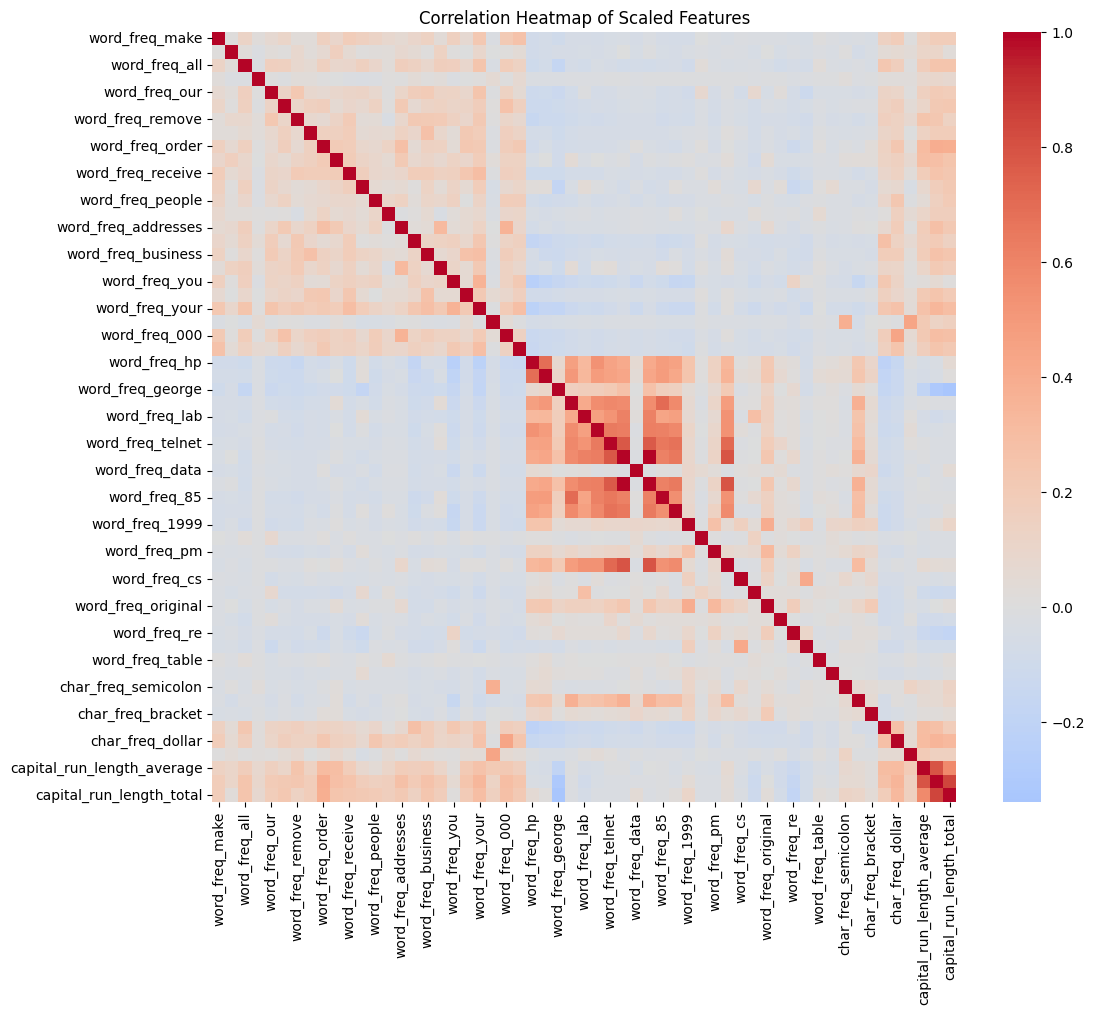

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Scaled Features")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


In [ ]:
X_pca.shape

(4601, 57)

Explained Variance vs. Number of PCA **Components**

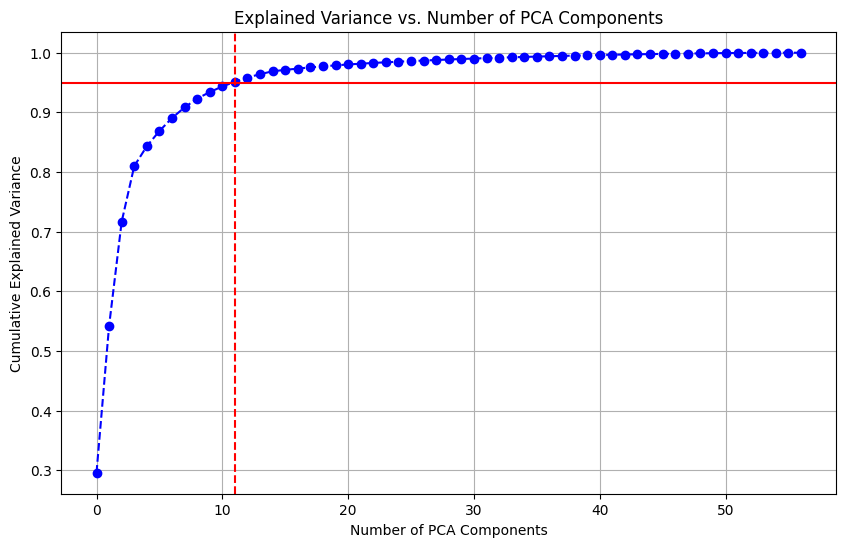

Number of components to retain 0.95 variance: 12


In [ ]:
cum_var = 0.95
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')  # Highlight 95% variance threshold
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.show()

print(f"Number of components to retain {cum_var} variance: {np.argmax(cumulative_variance >= cum_var) + 1}")


since Number of components to retain 0.95 variance: 12

In [ ]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.780582,-0.447912,-1.657570,-0.545505,1.854221,-0.642701,-0.905068,0.126398,0.272972,-0.135377,-0.297866,-0.063404
1,2.341971,-0.703063,2.740718,2.984098,0.411714,0.028418,-0.432115,-0.206415,0.692265,0.300320,0.382591,-0.062436
2,1.416391,-0.821671,2.803333,0.494875,2.699172,0.378627,1.193782,-0.398573,-0.115112,-0.698180,-0.052441,-0.290807
3,1.859327,-0.466717,-1.200994,2.472274,0.083095,-0.192405,0.654551,-0.142692,-0.601727,0.307179,0.469921,-0.291118
4,1.858871,-0.467120,-1.201599,2.471912,0.080976,-0.196831,0.656514,-0.152806,-0.600753,0.305391,0.468102,-0.289394


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km_clusters = km.fit_predict(X_pca)
X_pca_km = X_pca.copy()


In [ ]:
X_pca_km['km_clusters'] = km_clusters
X_pca_km["class"] = y

,0,1,2,3,4,5,6,7,8,9,10,11,km_clusters,class
0,1.780582,-0.447912,-1.657570,-0.545505,1.854221,-0.642701,-0.905068,0.126398,0.272972,-0.135377,-0.297866,-0.063404,1,1
1,2.341971,-0.703063,2.740718,2.984098,0.411714,0.028418,-0.432115,-0.206415,0.692265,0.300320,0.382591,-0.062436,1,1
2,1.416391,-0.821671,2.803333,0.494875,2.699172,0.378627,1.193782,-0.398573,-0.115112,-0.698180,-0.052441,-0.290807,1,1
3,1.859327,-0.466717,-1.200994,2.472274,0.083095,-0.192405,0.654551,-0.142692,-0.601727,0.307179,0.469921,-0.291118,1,1
4,1.858871,-0.467120,-1.201599,2.471912,0.080976,-0.196831,0.656514,-0.152806,-0.600753,0.305391,0.468102,-0.289394,1,1
5,-0.548482,-2.380233,-0.849304,-0.580868,0.880947,-0.394589,2.251067,0.492544,-1.446305,-0.529938,0.166905,-0.607533,1,1
6,5.035218,2.259856,-2.135994,1.876748,-0.671482,-1.691470,2.186016,0.451182,-0.553791,0.906022,-0.223438,-0.077508,1,1
7,-0.584075,-2.386470,-0.891709,-0.628467,0.699722,-0.585991,2.287098,0.558373,-1.409289,-0.520775,0.113610,-0.652156,1,1
8,1.620819,-1.523764,3.638540,2.574220,1.606114,0.878920,0.750772,-0.338032,0.180554,0.072910,0.333465,-0.057147,1,1
9,0.097391,-2.093437,0.689684,-0.944820,0.940215,-0.471044,-0.189363,-0.216802,1.091547,-0.203823,-0.233129,-0.533055,1,1


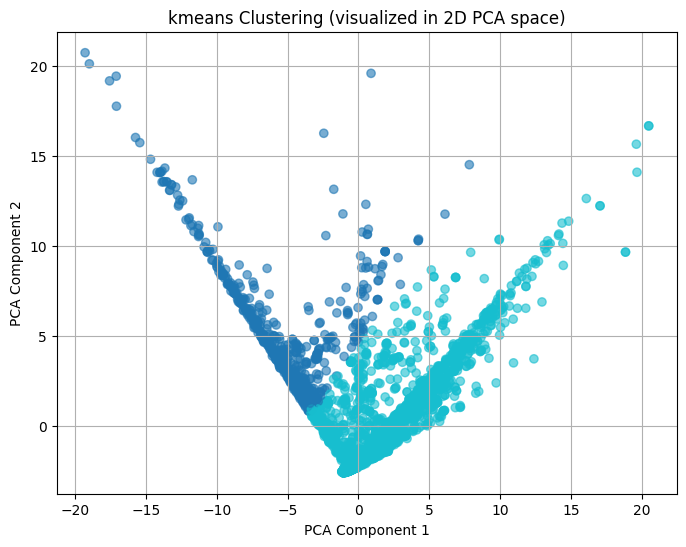

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=km_clusters, cmap='tab10', alpha=0.6)
plt.title("kmeans Clustering (visualized in 2D PCA space)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# now **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# **TRY DIFFRENT EPS**

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

for eps in [5,6, 7,7.5, 8, 9, 10]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(X_pca)

    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise = list(db_labels).count(-1)


    print(f"eps={eps}")



eps=5
eps=6
eps=7
eps=7.5
eps=8
eps=9
eps=10


choose eps = 7

In [ ]:
dbscan = DBSCAN(eps=7, min_samples=5)
db_labels = dbscan.fit_predict(X_pca)

X_pca_db = pd.DataFrame(X_pca)
X_pca_db['db_labels'] = db_labels
X_pca_db["class"] = y


,0,1,2,3,4,5,6,7,8,9,10,11,db_labels,class
0,1.780582,-0.447912,-1.657570,-0.545505,1.854221,-0.642701,-0.905068,0.126398,0.272972,-0.135377,-0.297866,-0.063404,0,1
1,2.341971,-0.703063,2.740718,2.984098,0.411714,0.028418,-0.432115,-0.206415,0.692265,0.300320,0.382591,-0.062436,0,1
2,1.416391,-0.821671,2.803333,0.494875,2.699172,0.378627,1.193782,-0.398573,-0.115112,-0.698180,-0.052441,-0.290807,0,1
3,1.859327,-0.466717,-1.200994,2.472274,0.083095,-0.192405,0.654551,-0.142692,-0.601727,0.307179,0.469921,-0.291118,0,1
4,1.858871,-0.467120,-1.201599,2.471912,0.080976,-0.196831,0.656514,-0.152806,-0.600753,0.305391,0.468102,-0.289394,0,1
5,-0.548482,-2.380233,-0.849304,-0.580868,0.880947,-0.394589,2.251067,0.492544,-1.446305,-0.529938,0.166905,-0.607533,0,1
6,5.035218,2.259856,-2.135994,1.876748,-0.671482,-1.691470,2.186016,0.451182,-0.553791,0.906022,-0.223438,-0.077508,0,1
7,-0.584075,-2.386470,-0.891709,-0.628467,0.699722,-0.585991,2.287098,0.558373,-1.409289,-0.520775,0.113610,-0.652156,0,1
8,1.620819,-1.523764,3.638540,2.574220,1.606114,0.878920,0.750772,-0.338032,0.180554,0.072910,0.333465,-0.057147,0,1
9,0.097391,-2.093437,0.689684,-0.944820,0.940215,-0.471044,-0.189363,-0.216802,1.091547,-0.203823,-0.233129,-0.533055,0,1


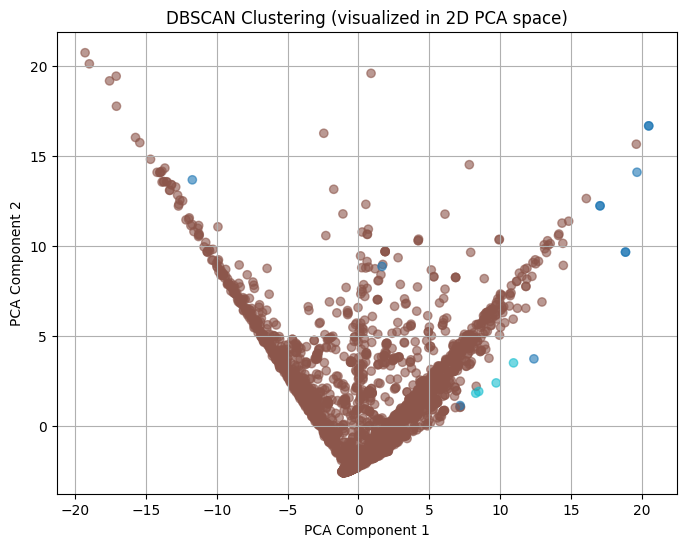

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=db_labels, cmap='tab10', alpha=0.6)
plt.title("DBSCAN Clustering (visualized in 2D PCA space)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


now **AgglomerativeClustering** WITH DIFF LINKAGE

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
for linkage in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    labels = model.fit_predict(X_pca)
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    print(f"{linkage.capitalize()} Linkage → ARI: {ari:.4f}, NMI: {nmi:.4f}")



Ward Linkage → ARI: 0.2450, NMI: 0.1921
Complete Linkage → ARI: 0.0225, NMI: 0.0380
Average Linkage → ARI: 0.0016, NMI: 0.0042
Single Linkage → ARI: 0.0002, NMI: 0.0006


In [ ]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(X_pca)


In [ ]:
x_pca_agglo = pd.DataFrame(X_pca)
x_pca_agglo['agglo_labels'] = agglo_labels
x_pca_agglo["class"] = y

,0,1,2,3,4,5,6,7,8,9,10,11,agglo_labels,class
0,1.780582,-0.447912,-1.657570,-0.545505,1.854221,-0.642701,-0.905068,0.126398,0.272972,-0.135377,-0.297866,-0.063404,1,1
1,2.341971,-0.703063,2.740718,2.984098,0.411714,0.028418,-0.432115,-0.206415,0.692265,0.300320,0.382591,-0.062436,0,1
2,1.416391,-0.821671,2.803333,0.494875,2.699172,0.378627,1.193782,-0.398573,-0.115112,-0.698180,-0.052441,-0.290807,0,1
3,1.859327,-0.466717,-1.200994,2.472274,0.083095,-0.192405,0.654551,-0.142692,-0.601727,0.307179,0.469921,-0.291118,1,1
4,1.858871,-0.467120,-1.201599,2.471912,0.080976,-0.196831,0.656514,-0.152806,-0.600753,0.305391,0.468102,-0.289394,1,1
5,-0.548482,-2.380233,-0.849304,-0.580868,0.880947,-0.394589,2.251067,0.492544,-1.446305,-0.529938,0.166905,-0.607533,0,1
6,5.035218,2.259856,-2.135994,1.876748,-0.671482,-1.691470,2.186016,0.451182,-0.553791,0.906022,-0.223438,-0.077508,1,1
7,-0.584075,-2.386470,-0.891709,-0.628467,0.699722,-0.585991,2.287098,0.558373,-1.409289,-0.520775,0.113610,-0.652156,0,1
8,1.620819,-1.523764,3.638540,2.574220,1.606114,0.878920,0.750772,-0.338032,0.180554,0.072910,0.333465,-0.057147,0,1
9,0.097391,-2.093437,0.689684,-0.944820,0.940215,-0.471044,-0.189363,-0.216802,1.091547,-0.203823,-0.233129,-0.533055,0,1


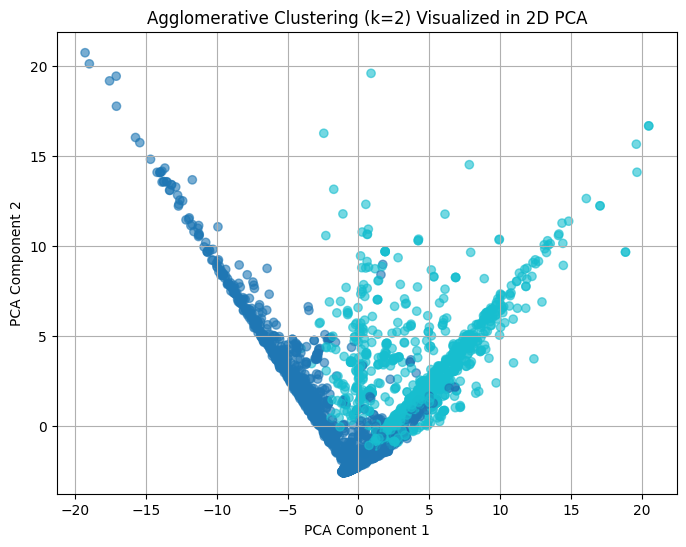

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=agglo_labels, cmap='tab10', alpha=0.6)
plt.title("Agglomerative Clustering (k=2) Visualized in 2D PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
final_df = pd.DataFrame({
    'km_clusters': X_pca_km['km_clusters'],
    'dbscan_labels': X_pca_db['db_labels'],
    'agglo_labels': x_pca_agglo['agglo_labels'],
    'true_class': y
})
final_df.head()

,km_clusters,dbscan_labels,agglo_labels,true_class
0,1,0,1,1
1,1,0,0,1
2,1,0,0,1
3,1,0,1,1
4,1,0,1,1


In [ ]:
from sklearn.metrics import silhouette_score

def evaluate_clusters(X, labels, name="Model"):
    print(f"\n📊 {name} Evaluation :")
    # Check if the number of unique labels is greater than 1
    if len(set(labels)) > 1:
       print("Silhouette Score:", silhouette_score(X, labels))
    else:
      print("Cannot compute Silhouette, Davies-Bouldin, and Calinski-Harabasz scores for a single cluster.")


# Example:
evaluate_clusters(X_pca, final_df['km_clusters'], name="KMeans")
evaluate_clusters(X_pca, final_df['dbscan_labels'], name="DBSCAN")
evaluate_clusters(X_pca, final_df['agglo_labels'], name="Agglomerative")


📊 KMeans Evaluation :
Silhouette Score: 0.36205951112749535

📊 DBSCAN Evaluation :
Silhouette Score: 0.7063587368440324

📊 Agglomerative Evaluation :
Silhouette Score: 0.32308529234150263
